In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
model_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.max.noidf/'
vocab_path = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0


INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7f8c0b270750>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 5.46206092834
ENCODE_UNK 1
load frozen graph from /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.max.noidf/model.ckpt-4.88-4000.pb with mapfile /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.max.noidf/model.ckpt-4.88-4000.map duration: 4.78813290596


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 2d63f72be32980b2e4b00202c92b1859579a221a


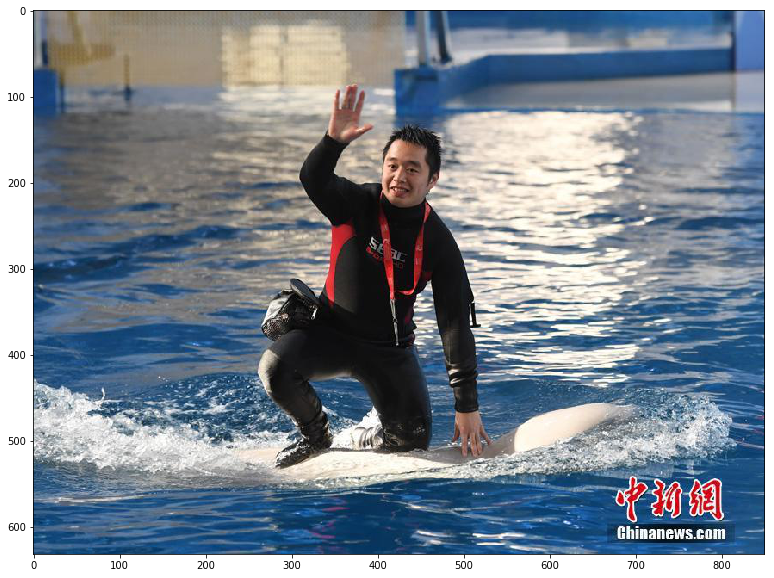

topwords of image:
0 船 0.574899|1 波浪 0.553613|2 海水 0.524019|3 湖上 0.515946|4 漂流 0.514745|5 氧气瓶 0.507281|6 泳池 0.504355|7 清澈 0.491356|8 水族馆 0.479776|9 水 0.47126|10 浪花 0.470118|11 河边 0.456159|12 海面 0.454765|13 水中 0.452196|14 号码牌 0.450654|15 海浪 0.433994|16 河面 0.42923|17 岸边 0.428236|18 甲板 0.409369|19 帽檐 0.404655|20 潜水衣 0.397225|21 小船 0.392582|22 划船 0.392118|23 网 0.389981|24 冰面 0.388639|25 碧波荡漾 0.385978|26 布满 0.384322|27 手柄 0.382185|28 吊 0.372396|29 露台 0.370258|30 泡温泉 0.367033|31 桥 0.363749|32 溜冰场 0.362509|33 腾空而起 0.35612|34 天 0.354422|35 溶洞 0.350935|36 竹竿 0.348584|37 游泳圈 0.348491|38 一只 0.346817|39 玩游戏 0.346513|40 划 0.346167|41 游乐 0.345345|42 海边 0.341957|43 绳索 0.337274|44 喷泉 0.336115|45 狗 0.335204|46 剪刀手 0.334689|47 打扫卫生 0.333337|48 湖里 0.331697|49 河里 0.330641|50 处理 0.330625|51 爬 0.330597|52 赤裸 0.328987|53 在划 0.327464|54 健壮 0.325905|55 练习 0.32217|56 铁杆 0.321479|57 山壁 0.32126|58 钱币 0.319254|59 高举着 0.318181|60 玩具 0.31564|61 文 0.31488|62 罩 0.314474|63 花式 0.313334|64 溜冰 0.313177|65 网兜 0.312968|66 

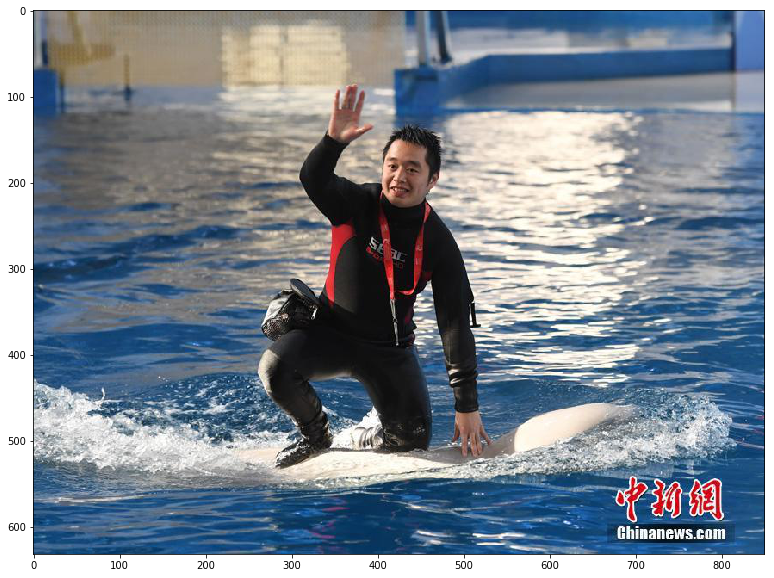

topwords of image:
0 船 0.574899|1 波浪 0.553613|2 海水 0.524019|3 湖上 0.515946|4 漂流 0.514745|5 氧气瓶 0.507281|6 泳池 0.504355|7 清澈 0.491356|8 水族馆 0.479776|9 水 0.47126|10 浪花 0.470118|11 河边 0.456159|12 海面 0.454765|13 水中 0.452196|14 号码牌 0.450654|15 海浪 0.433994|16 河面 0.42923|17 岸边 0.428236|18 甲板 0.409369|19 帽檐 0.404655|20 潜水衣 0.397225|21 小船 0.392582|22 划船 0.392118|23 网 0.389981|24 冰面 0.388639|25 碧波荡漾 0.385978|26 布满 0.384322|27 手柄 0.382185|28 吊 0.372396|29 露台 0.370258|30 泡温泉 0.367033|31 桥 0.363749|32 溜冰场 0.362509|33 腾空而起 0.35612|34 天 0.354422|35 溶洞 0.350935|36 竹竿 0.348584|37 游泳圈 0.348491|38 一只 0.346817|39 玩游戏 0.346513|40 划 0.346167|41 游乐 0.345345|42 海边 0.341957|43 绳索 0.337274|44 喷泉 0.336115|45 狗 0.335204|46 剪刀手 0.334689|47 打扫卫生 0.333337|48 湖里 0.331697|49 河里 0.330641|50 处理 0.330625|51 爬 0.330597|52 赤裸 0.328987|53 在划 0.327464|54 健壮 0.325905|55 练习 0.32217|56 铁杆 0.321479|57 山壁 0.32126|58 钱币 0.319254|59 高举着 0.318181|60 玩具 0.31564|61 文 0.31488|62 罩 0.314474|63 花式 0.313334|64 溜冰 0.313177|65 网兜 0.312968|66 

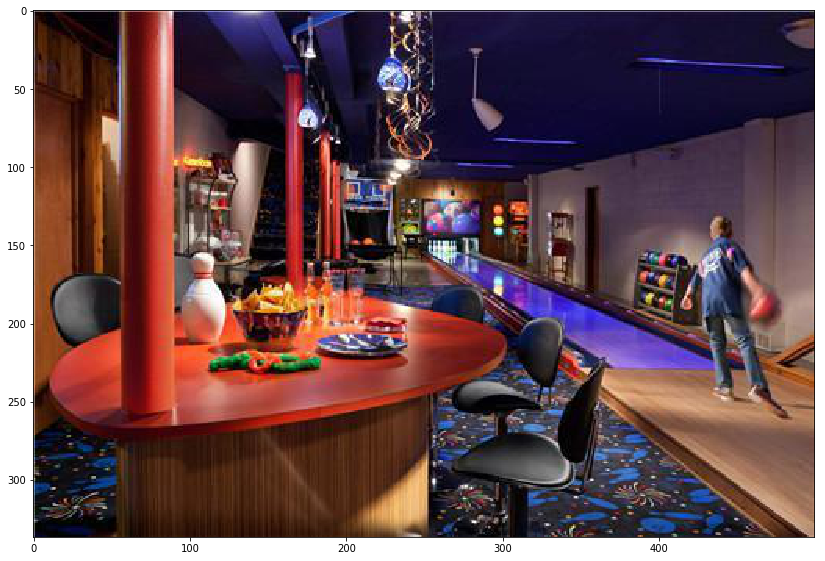

topwords of image:
0 餐厅 0.550292|1 柜台 0.536499|2 旁下 0.508155|3 桌子 0.505327|4 房门口 0.504351|5 教室 0.501023|6 饭店 0.480852|7 摆放 0.477524|8 办公室 0.472477|9 餐馆 0.472264|10 桌旁 0.45556|11 桌上 0.450945|12 温馨 0.444053|13 下围棋 0.438247|14 商店 0.434128|15 画框 0.432583|16 讲解 0.424378|17 棋盘 0.423113|18 店铺 0.417342|19 门口 0.412936|20 房屋里 0.411717|21 仪器 0.408982|22 上下 0.408798|23 酒杯 0.407865|24 位上 0.404463|25 屋子里 0.403194|26 琳琅满目 0.401674|27 屋内 0.401408|28 寺庙 0.401235|29 摄影棚 0.389399|30 文物 0.388756|31 房间 0.377055|32 食品 0.372162|33 纸牌 0.370826|34 使用 0.370766|35 看 0.366241|36 钱币 0.366025|37 伸 0.366014|38 沙发椅 0.363574|39 展厅 0.362917|40 沙发 0.359982|41 台前 0.359826|42 亭子 0.359374|43 光亮 0.356196|44 走廊 0.355366|45 一群 0.352904|46 镜子 0.348731|47 对面 0.348496|48 看同 0.342482|49 大厅 0.341151|50 学 0.33921|51 画板 0.339086|52 调色盘 0.337338|53 明亮 0.336181|54 鼠标 0.33504|55 帮 0.327746|56 试戴 0.326109|57 昏暗 0.326031|58 服务 0.320655|59 玩具 0.319897|60 里 0.318627|61 举杯 0.318495|62 柜子 0.318402|63 工艺品 0.317081|64 前切 0.314706|65 文 0.314076

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  # Size, in inches, of the output images.
  IMAGE_SIZE = (14, 10)
  #plt.subplot(1, 1, 1)  
  plt.figure(figsize=IMAGE_SIZE)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0

  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))